<a href="https://colab.research.google.com/github/alhamhotaki/Bayesian-Classifiers/blob/main/Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("/content/drive/MyDrive/MNIST_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/MNIST_test.csv")

# Display a subset of the data (e.g., first 10 rows)
#train_data = train_data1.sample(frac= 0.1)
#test_data = test_data1.sample(frac = 0.1)

#train_data.to_csv("train_data.csv")
#test_data.to_csv("test_data.csv")

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
train_data.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


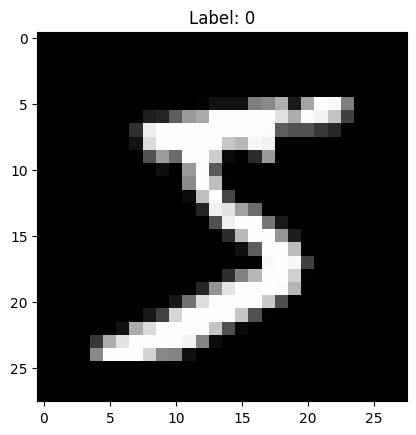

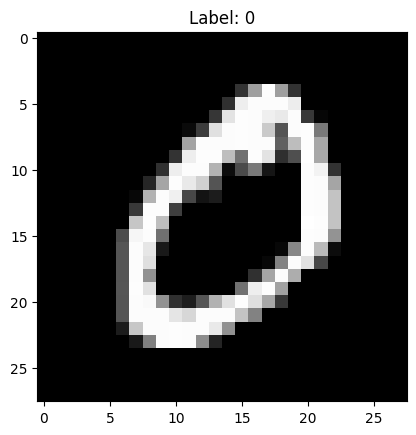

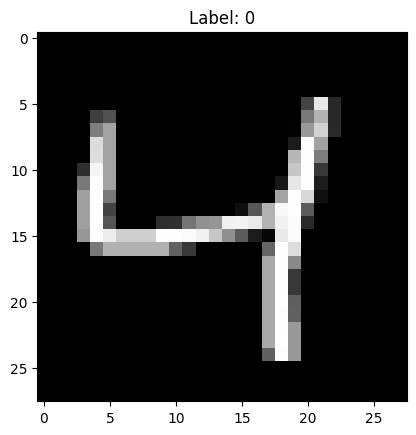

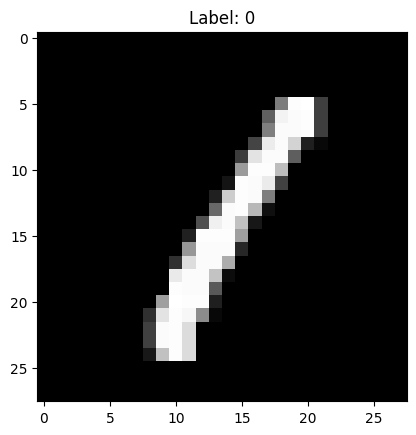

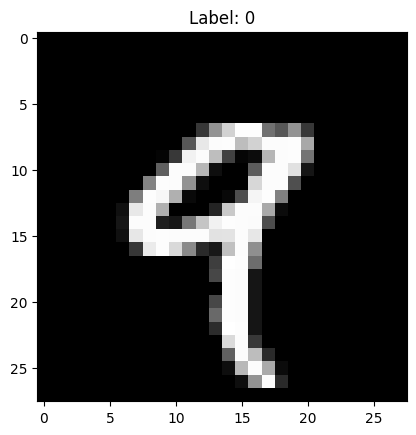

In [12]:
def visualize_digit(data, index):

    pixels = data.iloc[index, 3:].values

    pixels = pixels.reshape(28, 28)

    plt.imshow(pixels, cmap='gray')
    plt.title(f"Label: {data.iloc[index, 3]}")
    plt.show()


for i in range(5):
    visualize_digit(train_data, i)


In [13]:
# This code cleans the training and testing datasets by removing unnecessary columns, then separates the features (inputs) from the labels (outputs). It normalizes the feature data to scale the pixel values between 0 and 1, making it easier for the model to learn.

columns_to_drop = ['Unnamed: 0', 'index']
train_data_clean = train_data.drop(columns=columns_to_drop)
test_data_clean = test_data.drop(columns=columns_to_drop)


X_train = train_data_clean.drop(columns=['labels']).values
y_train = train_data_clean['labels'].values

X_test = test_data_clean.drop(columns=['labels']).values
y_test = test_data_clean['labels'].values


X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0


X_train_normalized[0, :5], X_test_normalized[0, :5]


(array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]))

In [14]:
# This code defines a Naive Bayes Classifier from scratch. It starts by initializing variables
# needed for the model. The 'fit' method calculates the mean, variance, and prior probabilities
# for each class in the training data. The 'predict' method uses these values to calculate
# the probability of each class for new data and predicts the class with the highest probability.
# Finally, the 'accuracy' method compares the predicted labels with the actual labels to determine
# how accurate the model is. The model is then trained with the normalized training data,
# predictions are made on the test data, and the accuracy is calculated.


class NaiveBayesClassifier:
    def __init__(self):
        self.priors = None
        self.means = None
        self.variances = None
        self.num_classes = None

    def fit(self, X, y):

        self.num_classes = len(np.unique(y))
        num_features = X.shape[1]


        self.means = np.zeros((self.num_classes, num_features))
        self.variances = np.zeros((self.num_classes, num_features))
        self.priors = np.zeros(self.num_classes)

        for c in range(self.num_classes):
            X_c = X[y == c]
            self.means[c, :] = np.mean(X_c, axis=0)
            self.variances[c, :] = np.var(X_c, axis=0) + 1e-6  # Adding a small value to avoid division by zero
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        posteriors = np.zeros((X.shape[0], self.num_classes))

        for c in range(self.num_classes):
            prior_log = np.log(self.priors[c])
            likelihood_log = -0.5 * np.sum(np.log(2. * np.pi * self.variances[c, :]))
            exponent = -0.5 * np.sum(((X - self.means[c, :]) ** 2) / (self.variances[c, :]), axis=1)
            posteriors[:, c] = prior_log + likelihood_log + exponent

        return np.argmax(posteriors, axis=1)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)


model = NaiveBayesClassifier()
model.fit(X_train_normalized, y_train)


y_pred = model.predict(X_test_normalized)


accuracy = model.accuracy(y_test, y_pred)
accuracy


0.6323

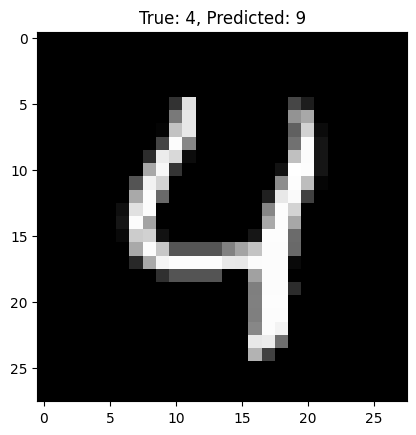

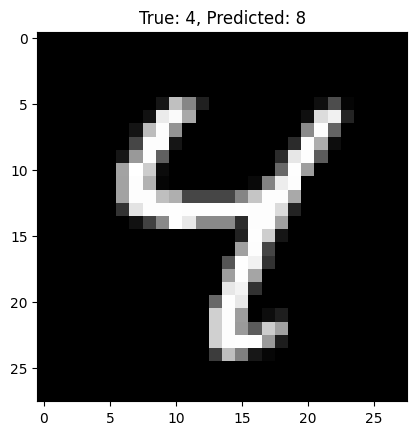

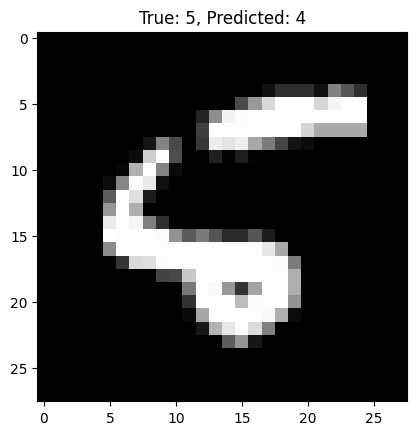

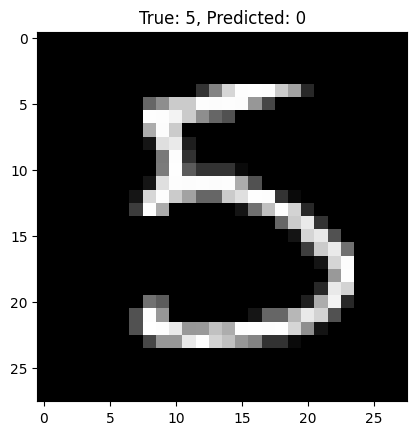

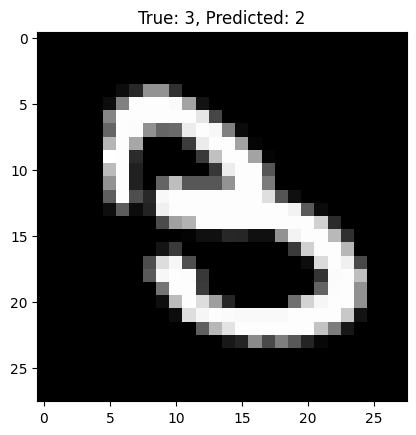

In [15]:
# This code visualizes the misclassified digits from the test set. First, it finds the indices
# where the model's predictions don't match the true labels. The function 'visualize_misclassified_digits'
# then takes a few of these misclassified examples and displays them using matplotlib. For each misclassified digit,
# it shows the image along with the true label and the label predicted by the model, allowing you to see
# where the model made mistakes.


misclassified_indices = np.where(y_pred != y_test)[0]

def visualize_misclassified_digits(data, true_labels, predicted_labels, indices, num_examples=5):
    for i in range(min(num_examples, len(indices))):
        idx = indices[i]
        pixels = data.iloc[idx, 3:].values.reshape(28, 28)
        true_label = true_labels[idx]
        predicted_label = predicted_labels[idx]
        plt.imshow(pixels, cmap='gray')
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.show()
visualize_misclassified_digits(test_data, y_test, y_pred, misclassified_indices, num_examples=5)

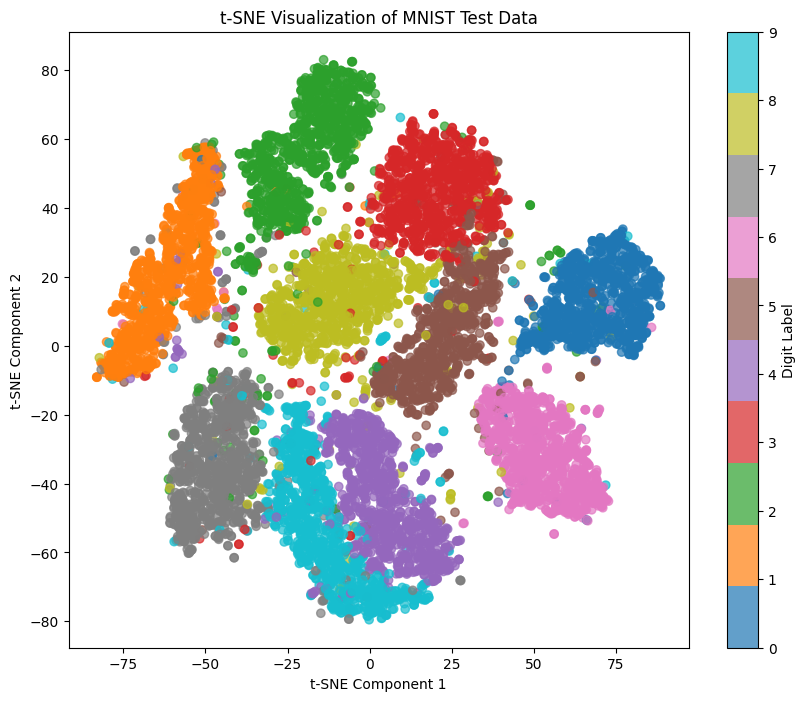

In [16]:
from sklearn.manifold import TSNE

# This code uses t-SNE (t-Distributed Stochastic Neighbor Embedding), a technique for reducing the dimensionality
# of high-dimensional data, to visualize the MNIST test data in 2D. The test data is transformed into two components
# using t-SNE, which helps to group similar digits together in the plot. The scatter plot then shows these
# transformed data points, colored by their actual digit labels, making it easier to see how different digits
# are clustered and how well-separated they are.

tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_normalized)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE Visualization of MNIST Test Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [17]:
from sklearn.decomposition import PCA

# This code uses PCA (Principal Component Analysis) to reduce the dimensionality of the MNIST dataset.
# PCA reduces the number of features from 784 (28x28 pixels) to 50, keeping only the most important information.
# The training data is first transformed using PCA, and then the same transformation is applied to the test data.
# This helps in making the model faster and less prone to overfitting by focusing on the most relevant features.


pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

X_train_pca.shape, X_test_pca.shape


((60000, 50), (10000, 50))

In [18]:
# This code creates a Multivariate Gaussian Bayes Classifier, which considers how features relate to each other.
# It calculates the mean, covariance, and prior probability for each class using the training data.
# The model predicts the class of new data by calculating probabilities based on these values.
# The model is trained on the PCA-reduced MNIST data, and its accuracy is tested and calculated.



class MultivariateGaussianBayesClassifier:
    def __init__(self):
        self.means = None
        self.covariances = None
        self.priors = None
        self.num_classes = None

    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        num_features = X.shape[1]

        self.means = np.zeros((self.num_classes, num_features))
        self.covariances = np.zeros((self.num_classes, num_features, num_features))
        self.priors = np.zeros(self.num_classes)

        for c in range(self.num_classes):
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)
            self.covariances[c] = np.cov(X_c, rowvar=False) + np.eye(num_features) * 1e-1
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def multivariate_gaussian_density(self, X, mean, covariance):
        n = X.shape[1]
        determinant = np.linalg.det(covariance)
        inverse_covariance = np.linalg.inv(covariance)
        term1 = 1 / np.sqrt((2 * np.pi) ** n * determinant)
        term2 = np.exp(-0.5 * np.sum((X - mean) @ inverse_covariance * (X - mean), axis=1))
        return term1 * term2

    def predict(self, X):
        posteriors = np.zeros((X.shape[0], self.num_classes))

        for c in range(self.num_classes):
            prior_log = np.log(self.priors[c])
            likelihood = self.multivariate_gaussian_density(X, self.means[c], self.covariances[c])
            posteriors[:, c] = prior_log + np.log(likelihood)

        return np.argmax(posteriors, axis=1)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)


multivariate_model = MultivariateGaussianBayesClassifier()
multivariate_model.fit(X_train_pca, y_train)

y_pred_multivariate = multivariate_model.predict(X_test_pca)


accuracy_multivariate = multivariate_model.accuracy(y_test, y_pred_multivariate)
accuracy_multivariate


0.9645

In [19]:
import numpy as np
from sklearn.neighbors import KernelDensity

# This code creates a KDE Bayes Classifier, which uses Kernel Density Estimation to model the probability distribution of the data.
# The 'fit' method trains the model by learning the distribution for each class using a Gaussian kernel.
# The 'predict' method calculates the log-probabilities for each class and predicts the most likely class for new data.
# The model is trained on the PCA-reduced MNIST data, and its accuracy is tested and printed.


class KDEBayesClassifier:
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth
        self.kdes = []
        self.priors = None
        self.num_classes = None

    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.priors = np.zeros(self.num_classes)

        for c in range(self.num_classes):
            X_c = X[y == c]
            kde = KernelDensity(kernel='gaussian', bandwidth=self.bandwidth)
            kde.fit(X_c)
            self.kdes.append(kde)
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict_log_proba(self, X):
        log_posteriors = np.zeros((X.shape[0], self.num_classes))

        for c in range(self.num_classes):
            log_prior = np.log(self.priors[c])
            log_likelihood = self.kdes[c].score_samples(X)
            log_posteriors[:, c] = log_prior + log_likelihood

        return log_posteriors

    def predict(self, X):
        log_posteriors = self.predict_log_proba(X)


        max_log_posteriors = np.max(log_posteriors, axis=1, keepdims=True)
        log_sum_exp = max_log_posteriors + np.log(np.sum(np.exp(log_posteriors - max_log_posteriors), axis=1, keepdims=True))


        normalized_log_posteriors = log_posteriors - log_sum_exp

        return np.argmax(normalized_log_posteriors, axis=1)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)


kde_model = KDEBayesClassifier(bandwidth=1.0)
kde_model.fit(X_train_pca, y_train)


y_pred_kde = kde_model.predict(X_test_pca)


accuracy_kde = kde_model.accuracy(y_test, y_pred_kde)
print(f"Final Test Accuracy with KDE: {accuracy_kde * 100:.2f}%")


Final Test Accuracy with KDE: 97.36%
